SENTIMENTAL ANALYSIS OF PROCESSED GHANA'S INFLATION DATA 

In [105]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [106]:
with open('inflation.pkl', 'rb') as pickle_file:
    tweets = pickle.load(pickle_file)

In [107]:
tweets.head()

,Tweet_text,tweetsText,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,RT @steve_hanke: Leading member of the New Patriotic Party (NPP) Gabby Otchere-Darko says Pres. ...,Leading member of the New Patriotic Party NPP Gabby Otchere Darko says Pres Akufo Addo deser...,"[Leading, member, of, the, New, Patriotic, Party, NPP, Gabby, Otchere, Darko, says, Pres, Akufo,...","[leading, member, of, the, new, patriotic, party, npp, gabby, otchere, darko, says, pres, akufo,...","[leading, member, of, the, new, patriotic, party, npp, gabby, otchere, darko, says, pres, akufo,...","[leading, member, new, patriotic, party, npp, gabby, otchere, darko, says, pres, akufo, addo, de...","[(leading, VBG), (member, NN), (new, JJ), (patriotic, JJ), (party, NN), (npp, JJ), (gabby, NN), ...","[(leading, v), (member, n), (new, a), (patriotic, a), (party, n), (npp, a), (gabby, n), (otchere...","[lead, member, new, patriotic, party, npp, gabby, otchere, darko, say, pres, akufo, addo, deserv..."
11,"RT @steve_hanke: #Ghana's economic woes continue to mount. Today, I measure inflation in Ghana a...",Ghana s economic woes continue to mount Today I measure inflation in Ghana at a stunning 81 ...,"[Ghana, s, economic, woes, continue, to, mount, Today, I, measure, inflation, in, Ghana, at, a, ...","[ghana, s, economic, woes, continue, to, mount, today, i, measure, inflation, in, ghana, at, a, ...","[ghana, s, economic, woes, continue, to, mount, today, i, measure, inflation, in, ghana, at, a, ...","[ghana, economic, woes, continue, mount, today, measure, inflation, ghana, stunning, 81, 04, yr,...","[(ghana, JJ), (economic, JJ), (woes, NNS), (continue, VBP), (mount, NN), (today, NN), (measure, ...","[(ghana, a), (economic, a), (woes, n), (continue, v), (mount, n), (today, n), (measure, n), (inf...","[ghana, economic, woe, continue, mount, today, measure, inflation, ghana, stun, 81, 04, yr, near..."
16,"RT @steve_hanke: #Ghana ranks 2nd in the countries most likely to default on their debt, accordi...",Ghana ranks 2nd in the countries most likely to default on their debt according to Bloomberg ...,"[Ghana, ranks, 2nd, in, the, countries, most, likely, to, default, on, their, debt, according, t...","[ghana, ranks, 2nd, in, the, countries, most, likely, to, default, on, their, debt, according, t...","[ghana, ranks, 2nd, in, the, countries, most, likely, to, default, on, their, debt, according, t...","[ghana, ranks, 2nd, countries, likely, default, debt, according, bloomberg, today, measure, gha,...","[(ghana, JJ), (ranks, VBZ), (2nd, CD), (countries, NNS), (likely, JJ), (default, NN), (debt, NN)...","[(ghana, a), (ranks, v), (2nd, n), (countries, n), (likely, a), (default, n), (debt, n), (accord...","[ghana, rank, 2nd, country, likely, default, debt, accord, bloomberg, today, measure, gha, inf]"
20,"RT @NsiaYaw2: The Chief Executive Officer of Dalex Finance, Kenneth Kwamina Thompson, says while...",The Chief Executive Officer of Dalex Finance Kenneth Kwamina Thompson says while the Statisti...,"[The, Chief, Executive, Officer, of, Dalex, Finance, Kenneth, Kwamina, Thompson, says, while, th...","[the, chief, executive, officer, of, dalex, finance, kenneth, kwamina, thompson, says, while, th...","[the, chief, executive, officer, of, dalex, finance, kenneth, kwamina, thompson, says, while, th...","[chief, executive, officer, dalex, finance, kenneth, kwamina, thompson, says, statistical, servi...","[(chief, JJ), (executive, NN), (officer, NN), (dalex, JJ), (finance, NN), (kenneth, VBD), (kwami...","[(chief, a), (executive, n), (officer, n), (dalex, a), (finance, n), (kenneth, v), (kwamina, n),...","[chief, executive, officer, dalex, finance, kenneth, kwamina, thompson, say, statistical, servic..."
25,@steve_hanke Everyday u are measuring Ghana's inflation 🤣🤣,hanke Everyday u are measuring Ghana s inflation,"[hanke, Everyday, u, are, measuring, Ghana, s, inflation]","[hanke, everyday, u, are, measuring, ghana, s, inflation]","[hanke, everyday

In [108]:
tweets = tweets[['lemmatized']]
tweets.head()

,lemmatized
0,"[lead, member, new, patriotic, party, npp, gabby, otchere, darko, say, pres, akufo, addo, deserv..."
11,"[ghana, economic, woe, continue, mount, today, measure, inflation, ghana, stun, 81, 04, yr, near..."
16,"[ghana, rank, 2nd, country, likely, default, debt, accord, bloomberg, today, measure, gha, inf]"
20,"[chief, executive, officer, dalex, finance, kenneth, kwamina, thompson, say, statistical, servic..."
25,"[hanke, everyday, u, measure, ghana, inflation]"


In [109]:
tweets['lemma_str'] = [' '.join(map(str,l)) for l in tweets['lemmatized']]
tweets.head()

,lemmatized,lemma_str
0,"[lead, member, new, patriotic, party, npp, gabby, otchere, darko, say, pres, akufo, addo, deserv...",lead member new patriotic party npp gabby otchere darko say pres akufo addo deserves praise handli
11,"[ghana, economic, woe, continue, mount, today, measure, inflation, ghana, stun, 81, 04, yr, near...",ghana economic woe continue mount today measure inflation ghana stun 81 04 yr nearly 2 4x
16,"[ghana, rank, 2nd, country, likely, default, debt, accord, bloomberg, today, measure, gha, inf]",ghana rank 2nd country likely default debt accord bloomberg today measure gha inf
20,"[chief, executive, officer, dalex, finance, kenneth, kwamina, thompson, say, statistical, servic...",chief executive officer dalex finance kenneth kwamina thompson say statistical service peg ghana...
25,"[hanke, everyday, u, measure, ghana, inflation]",hanke everyday u measure ghana inflation


In [110]:
#Calculating Negative, Positive, Neutral and Compound values

tweets[['polarity', 'subjectivity']] = tweets['lemma_str'].apply(lambda lemma_str: pd.Series(TextBlob(lemma_str).sentiment))
for index, row in tweets['lemma_str'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweets.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweets.loc[index, 'sentiment'] = "positive"
    else:
        tweets.loc[index, 'sentiment'] = "neutral"
    tweets.loc[index, 'neg'] = neg
    tweets.loc[index, 'neu'] = neu
    tweets.loc[index, 'pos'] = pos
    tweets.loc[index, 'compound'] = comp

tweets.head(10)

,lemmatized,lemma_str,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"[lead, member, new, patriotic, party, npp, gabby, otchere, darko, say, pres, akufo, addo, deserv...",lead member new patriotic party npp gabby otchere darko say pres akufo addo deserves praise handli,0.136364,0.454545,positive,0.000,0.690,0.310,0.7430
11,"[ghana, economic, woe, continue, mount, today, measure, inflation, ghana, stun, 81, 04, yr, near...",ghana economic woe continue mount today measure inflation ghana stun 81 04 yr nearly 2 4x,0.150000,0.300000,negative,0.167,0.833,0.000,-0.4215
16,"[ghana, rank, 2nd, country, likely, default, debt, accord, bloomberg, today, measure, gha, inf]",ghana rank 2nd country likely default debt accord bloomberg today measure gha inf,-0.266667,0.633333,negative,0.172,0.828,0.000,-0.3612
20,"[chief, executive, officer, dalex, finance, kenneth, kwamina, thompson, say, statistical, servic...",chief executive officer dalex finance kenneth kwamina thompson say statistical service peg ghana...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
25,"[hanke, everyday, u, measure, ghana, inflation]",hanke everyday u measure ghana inflation,-0.200000,0.600000,neutral,0.000,1.000,0.000,0.0000
67,"[statistical, service, estimate, ghana, inflation, rate, 33, 9, kenneth, kwamina, thompson, chie...",statistical service estimate ghana inflation rate 33 9 kenneth kwamina thompson chief executive,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
127,"[lead, member, new, patriotic, party, npp, gabby, otchere, darko, say, pres, akufo, addo, deserv...",lead member new patriotic party npp gabby otchere darko say pres akufo addo deserves praise handle,0.136364,0.454545,positive,0.000,0.690,0.310,0.7430
199,"[lead, member, new, patriotic, party, npp, gabby, otchere, darko, say, pres, akufo, addo, deserv...",lead member new patriotic party npp gabby otchere darko say pres akufo addo deserves praise,0.136364,0.454545,positive,0.000,0.674,0.326,0.7430
208,"[lead, member, new, patriotic, party, npp, gabby, otchere, darko, say, pres, akufo, addo, deserv...",lead member new patriotic party npp gabby otchere darko say pres akufo addo deserves praise,0.136364,0.454545,positive,0.000,0.674,0.326,0.7430
209,"[ghana, vp, bawumia, say, politics, help, people, solve, problem, spoiler, alert, bawumia, one, ...",ghana vp bawumia say politics help people solve problem spoiler alert bawumia one create th,0.000000,0.000000,positive,0.126,0.465,0.409,0.6249


In [111]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweets_negative = tweets[tweets["sentiment"]=="negative"]
tweets_positive = tweets[tweets["sentiment"]=="positive"]
tweets_neutral = tweets[tweets["sentiment"]=="neutral"]

In [112]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [113]:
#Count_values for sentiment
count_values_in_column(tweets,"sentiment")

,Total,Percentage
neutral,108,46.55
positive,85,36.64
negative,39,16.81


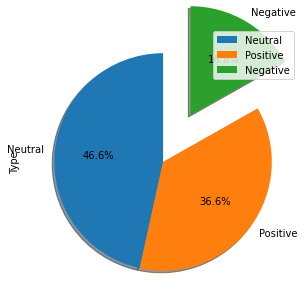

In [114]:
# 0: Positive, 1: Neutral, 2: Negative
location_count = [len(tweets_neutral),len(tweets_positive),len(tweets_negative)]

graph_data = { 'Type': location_count }
  
df = pd.DataFrame(graph_data,columns=['Type'],index=["Neutral", "Positive", "Negative"])
df.plot.pie(y='Type',figsize=(5, 5),autopct='%1.1f%%', startangle=90, explode = (0,0,0.5), shadow = True)
plt.show()



In [115]:
words = list(tweets.lemmatized)
allwords = []
for wordlist in words:
    allwords += wordlist

In [116]:
mostcommon = FreqDist(allwords).most_common(100)

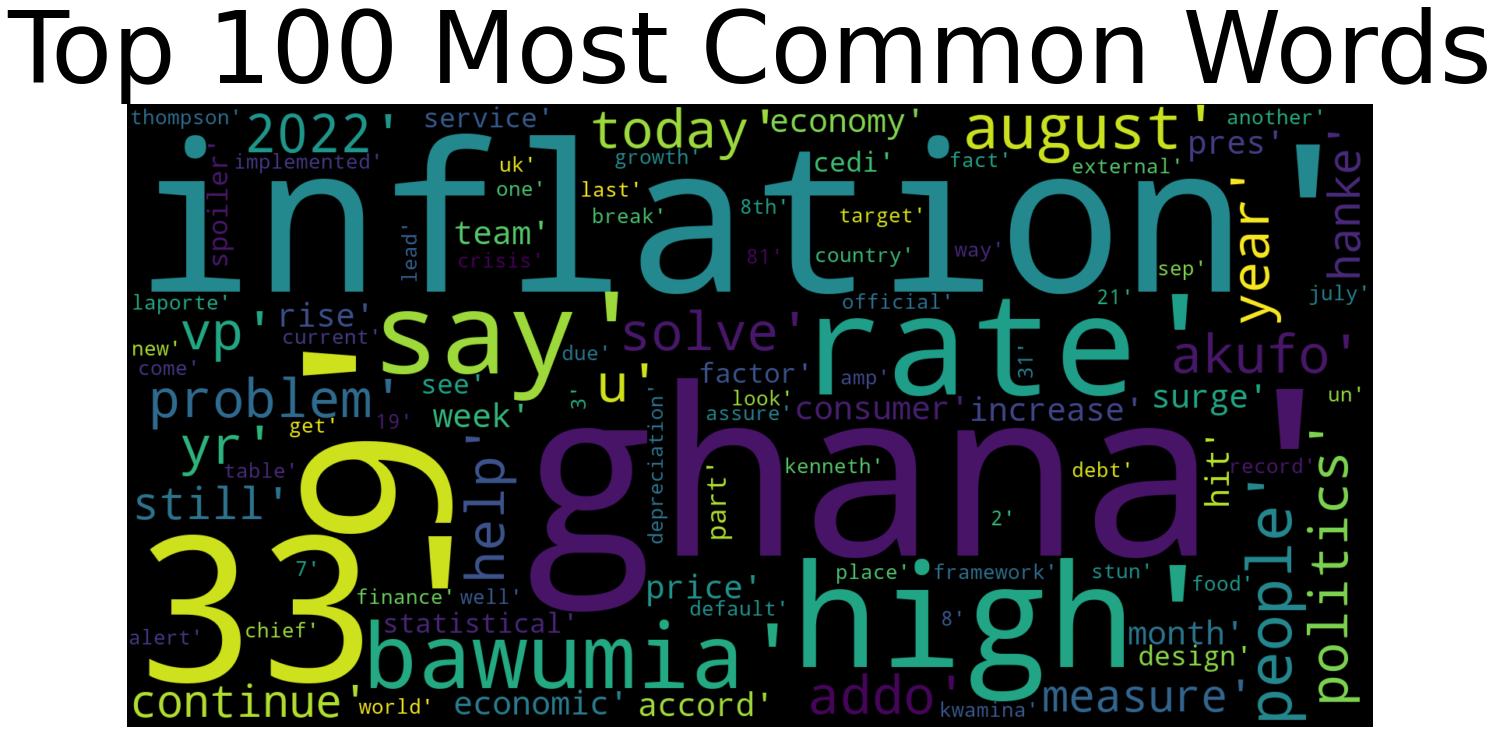

In [117]:
wordcloud = WordCloud(width=1600, height=800, background_color='black').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()
warnings.filterwarnings("ignore") 

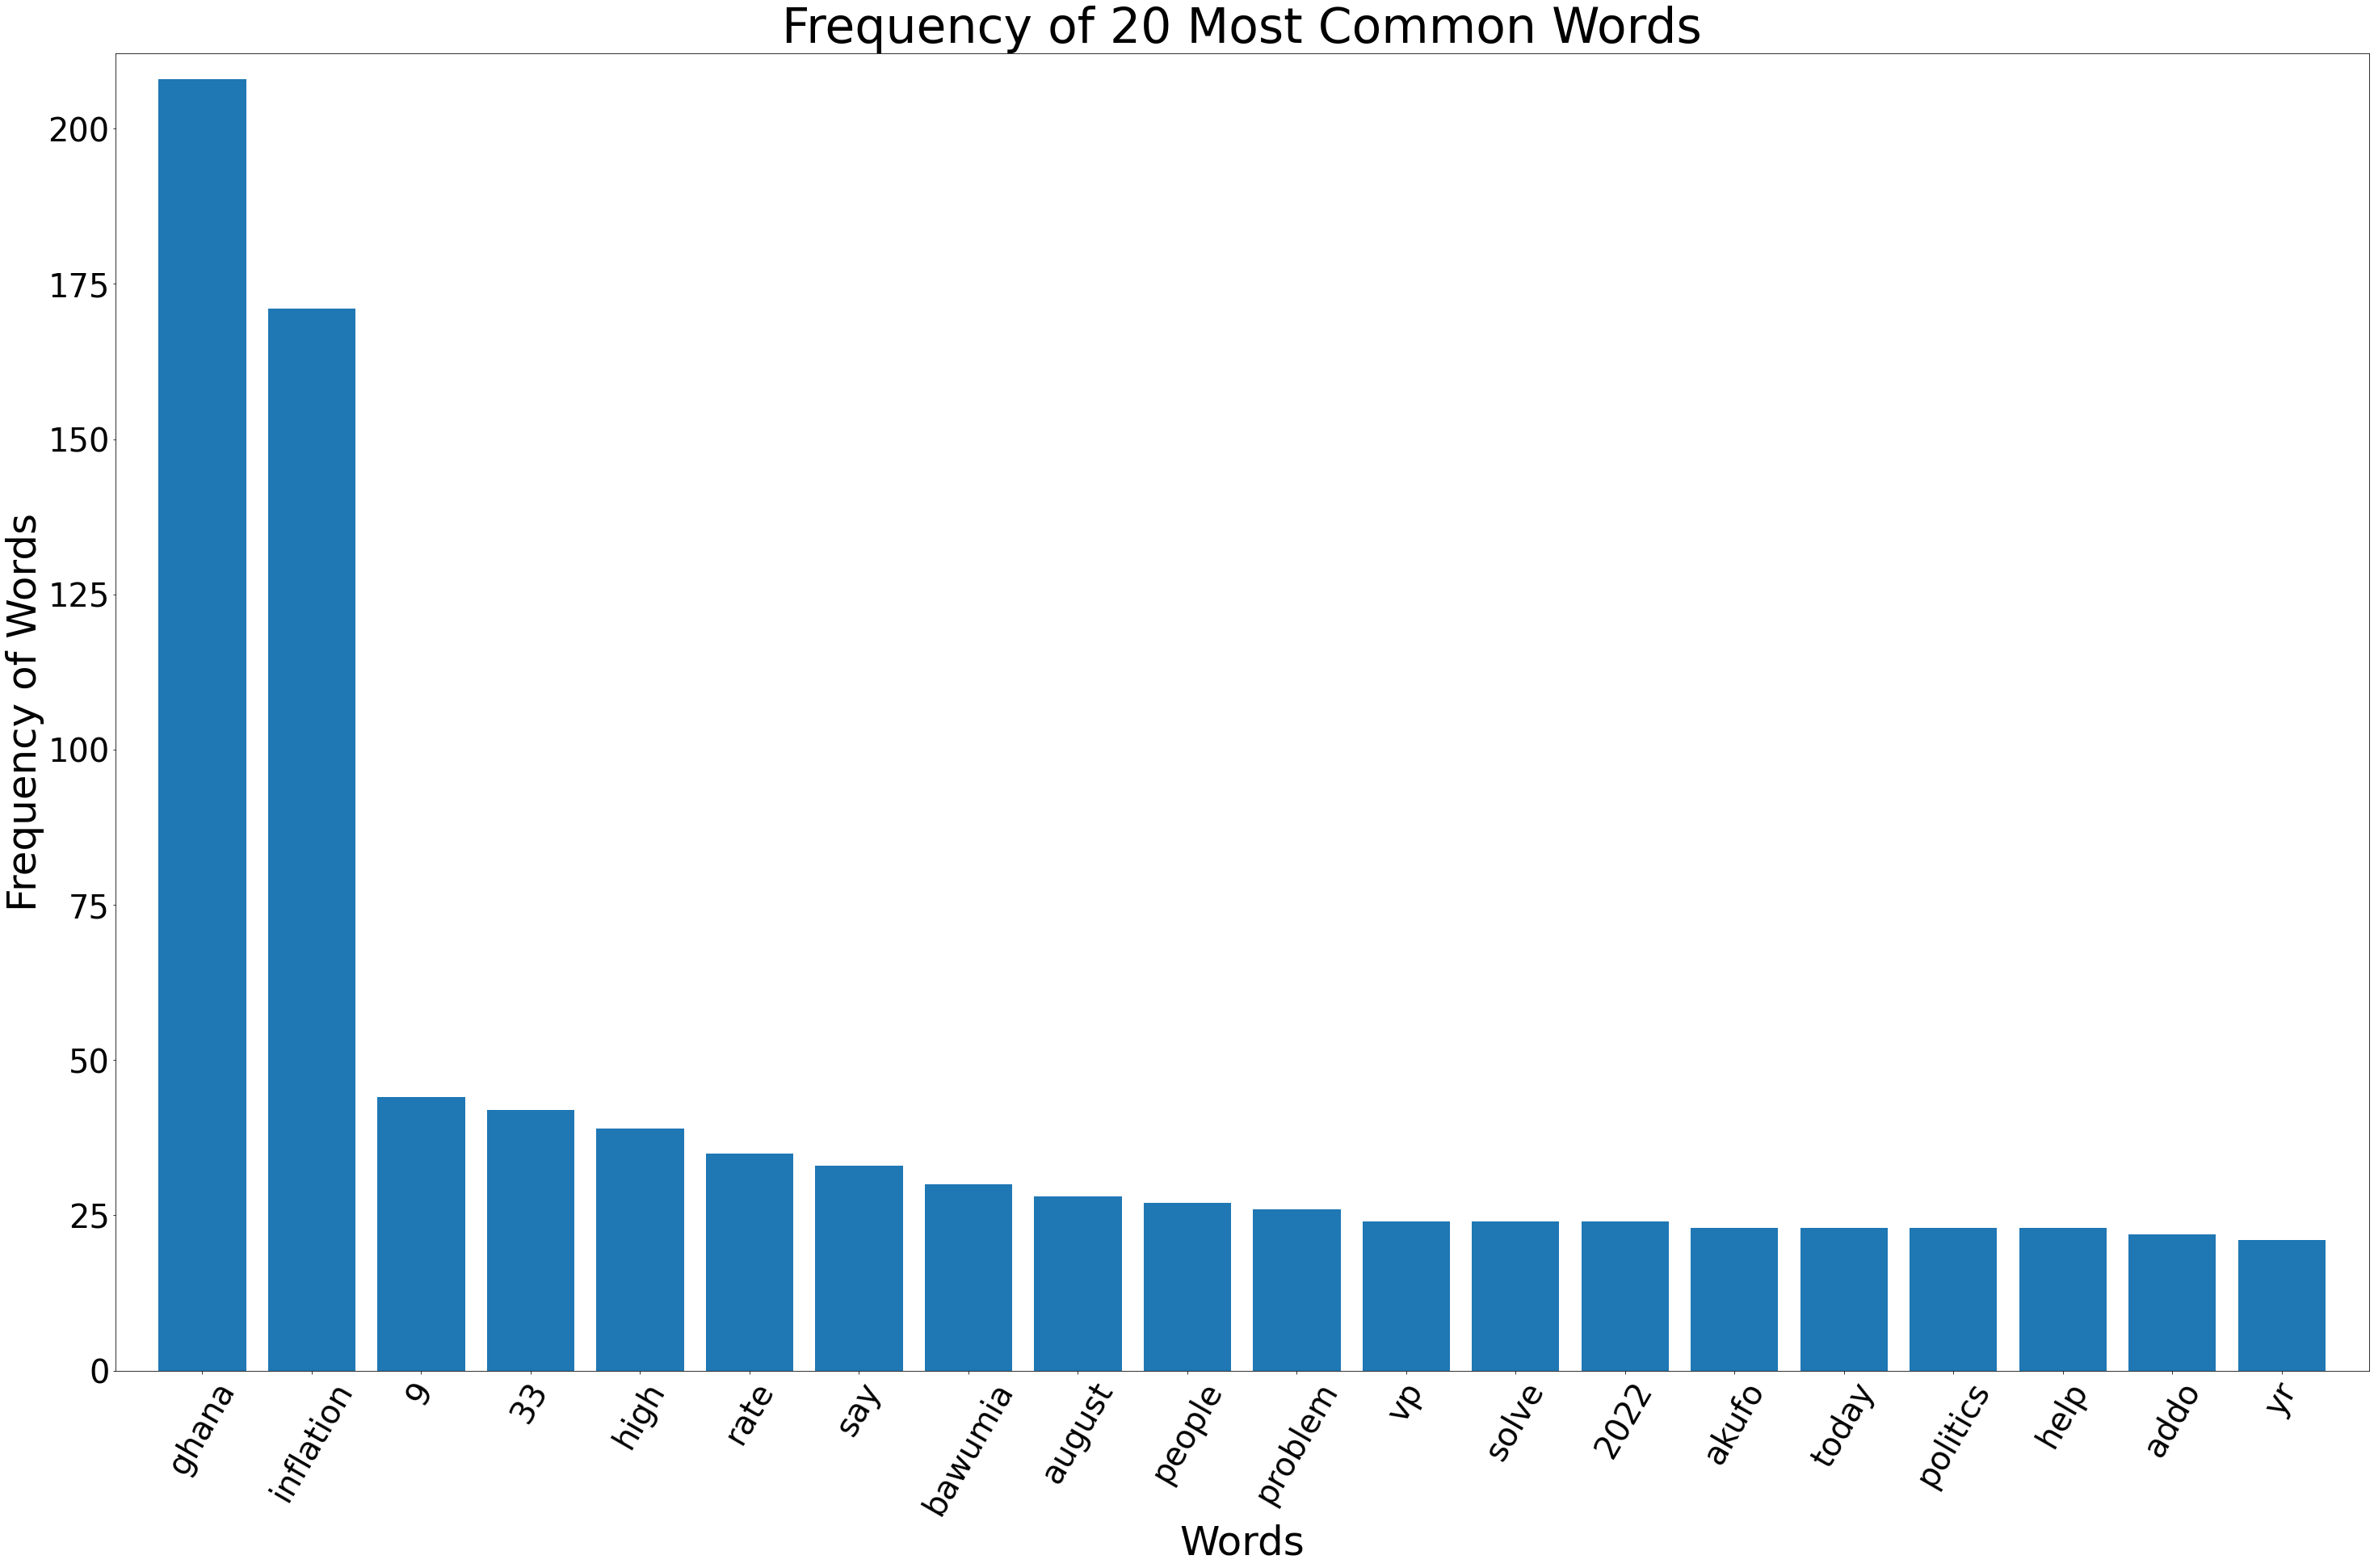

In [118]:
mostcommon_small = FreqDist(allwords).most_common(20)
x, y = zip(*mostcommon_small)
# create a figure
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words', fontsize=60)
plt.show()

In [119]:
words = list(tweets_negative.lemmatized)
allwordsNeg = []
for wordlist in words:
    allwordsNeg += wordlist

In [120]:
mostcommon = FreqDist(allwordsNeg).most_common(100)

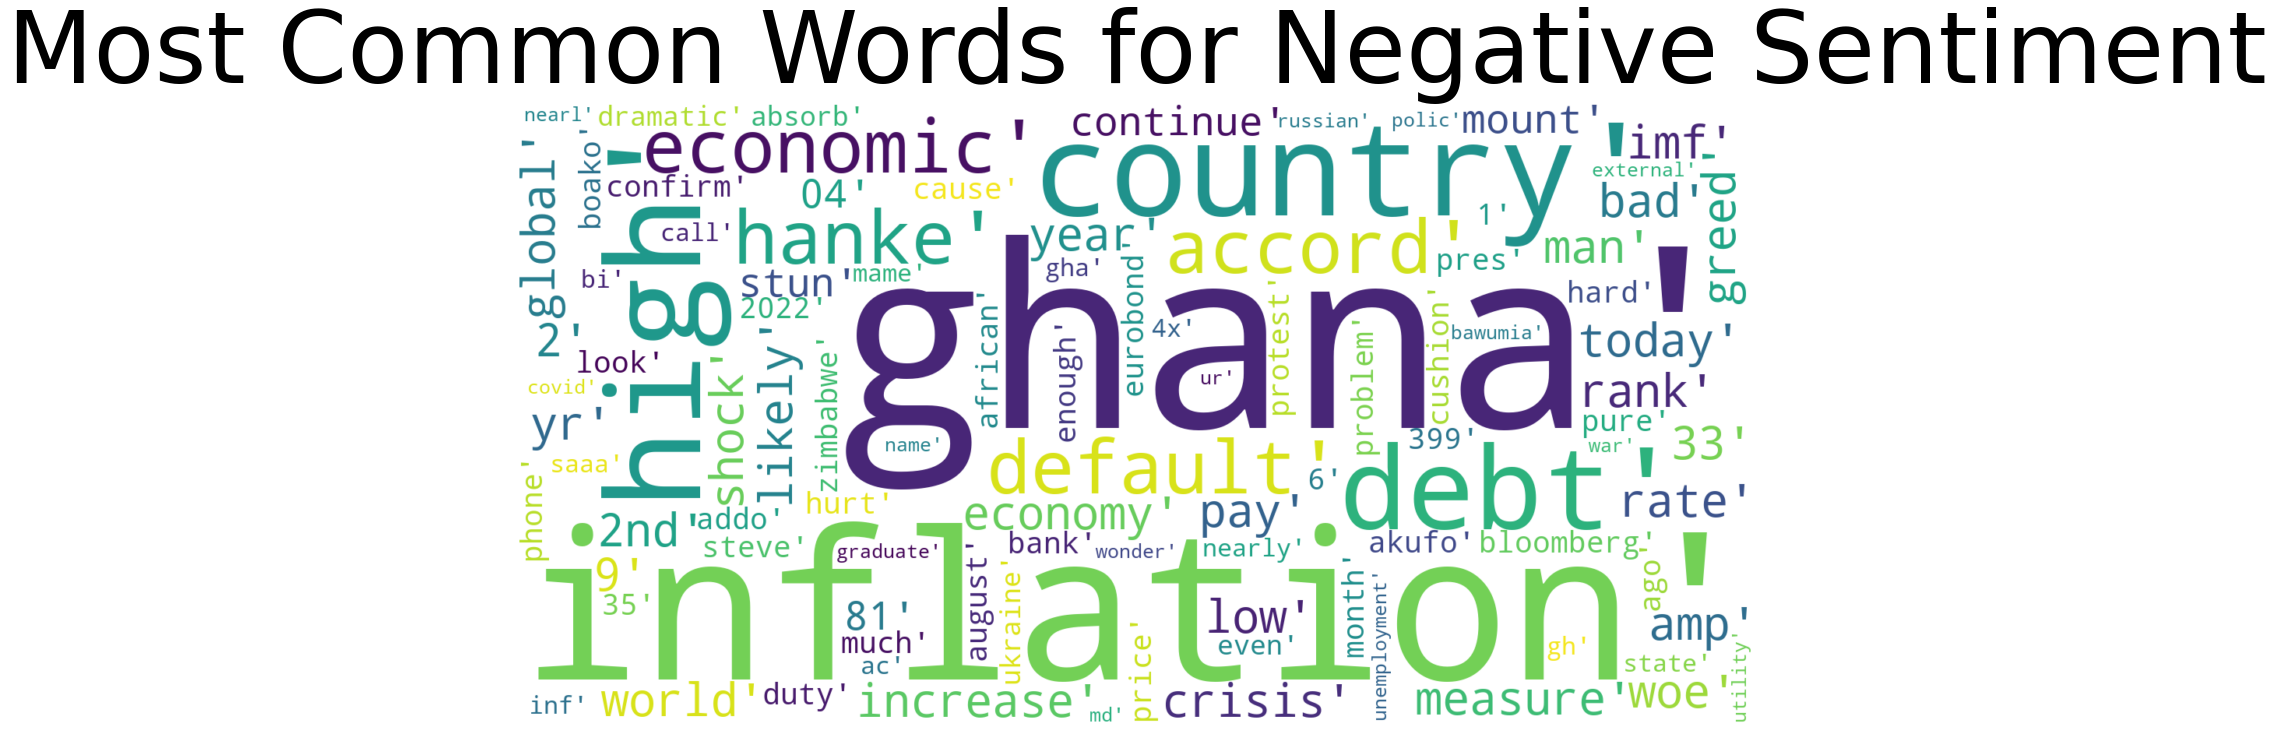

In [121]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Words for Negative Sentiment', fontsize=100)

plt.tight_layout(pad=0)
plt.show()
warnings.filterwarnings("ignore") 

In [123]:
words = list(tweets_positive.lemmatized)
allwordsPos = []
for wordlist in words:
    allwordsPos += wordlist

In [124]:
mostcommon = FreqDist(allwordsPos).most_common(100)

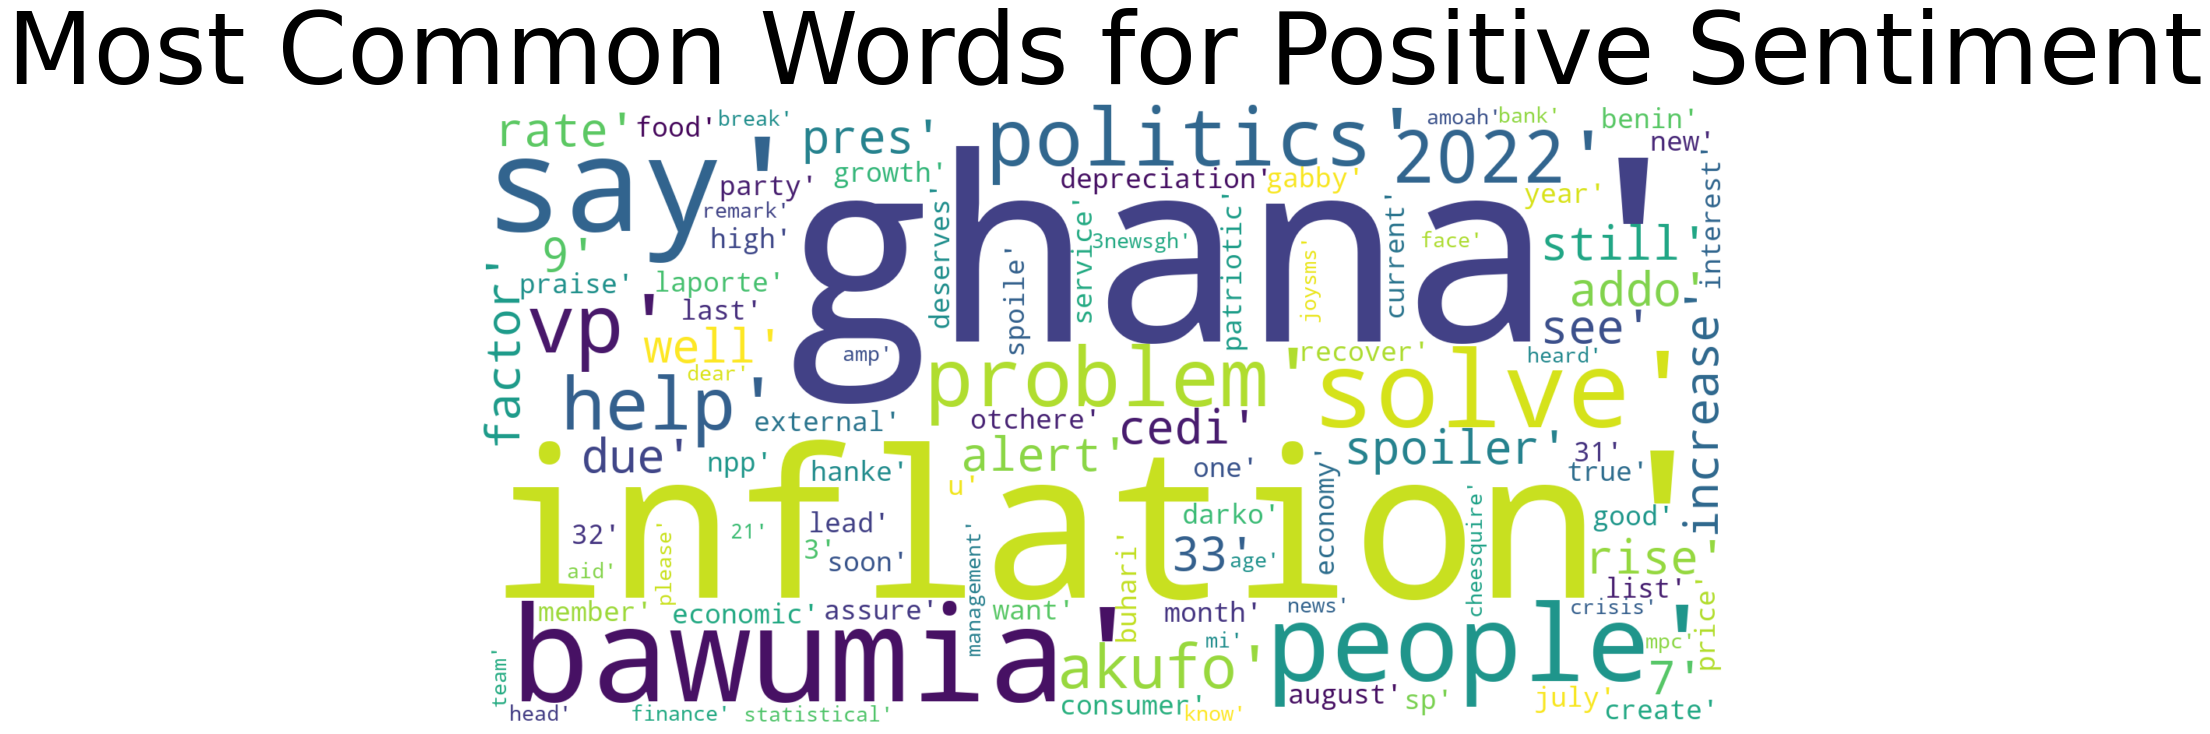

In [125]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Words for Positive Sentiment', fontsize=100)

plt.tight_layout(pad=0)
plt.show()
warnings.filterwarnings("ignore")